In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./SLID.csv')
data

,Unnamed: 0,wages,education,age,sex,language
0,1,10.56,15.0,40,Male,English
1,2,11.00,13.2,19,Male,English
2,3,NaN,16.0,49,Male,Other
3,4,17.76,14.0,46,Male,Other
4,5,NaN,8.0,71,Male,English
...,...,...,...,...,...,...
7420,7421,NaN,8.0,73,Male,Other
7421,7422,30.49,16.0,52,Male,Other
7422,7423,22.00,15.0,41,Male,Other
7423,7424,11.85,11.0,47,Female,English


In [3]:
#Dimensions of dataset
data.shape

(7425, 6)

In [4]:
data.columns

Index(['Unnamed: 0', 'wages', 'education', 'age', 'sex', 'language'], dtype='object')

In [5]:
#Handling Null Values
data.isnull().sum()

Unnamed: 0       0
wages         3278
education      249
age              0
sex              0
language       121
dtype: int64

In [6]:
data.dropna(inplace=True)
data.isnull().sum()

Unnamed: 0    0
wages         0
education     0
age           0
sex           0
language      0
dtype: int64

In [7]:
#Dropping Unnecessary column
df = data.drop(['Unnamed: 0'], axis=1)
df.columns

Index(['wages', 'education', 'age', 'sex', 'language'], dtype='object')

In [8]:
#After Data Pre-processing
df

,wages,education,age,sex,language
0,10.56,15.0,40,Male,English
1,11.00,13.2,19,Male,English
3,17.76,14.0,46,Male,Other
5,14.00,16.0,50,Female,English
8,8.20,15.0,31,Male,English
...,...,...,...,...,...
7417,6.80,13.1,20,Male,English
7421,30.49,16.0,52,Male,Other
7422,22.00,15.0,41,Male,Other
7423,11.85,11.0,47,Female,English


In [9]:
#Data Visualization

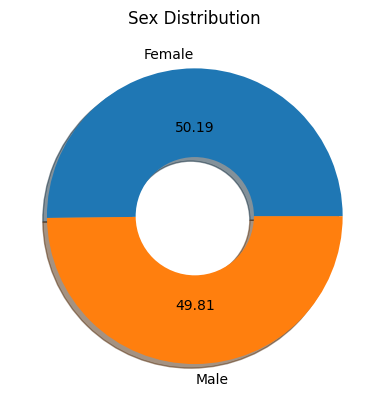

In [10]:
#Male vs Female
cnt = df['sex'].value_counts()
plt.pie(cnt, labels=cnt.index, shadow=True, wedgeprops=dict(width = 0.6), autopct='%1.2f')
plt.title('Sex Distribution')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

<Figure size 900x700 with 0 Axes>

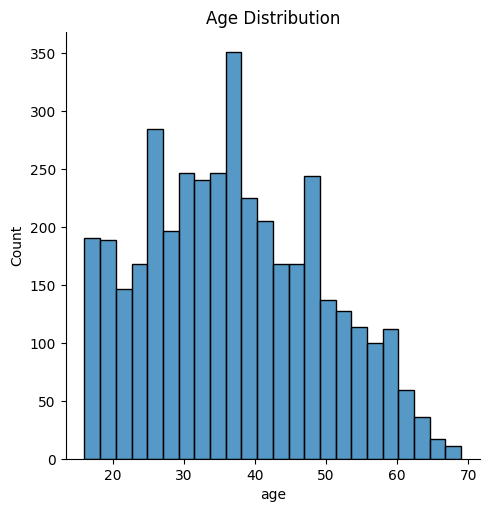

In [11]:
#Age Distribution
plt.figure(figsize=(9,7))
sns.displot(df['age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Age Distribution (Male)')

<Figure size 900x700 with 0 Axes>

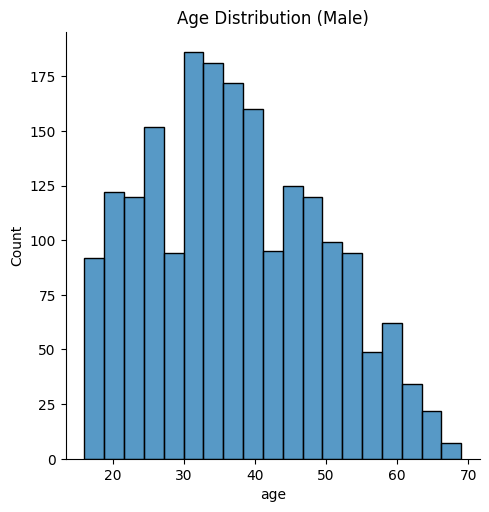

In [12]:
plt.figure(figsize=(9,7))
dfm = df.loc[df['sex'] == 'Male']
sns.displot(dfm['age'])
plt.title('Age Distribution (Male)')

Text(0.5, 1.0, 'Age Distribution (Female)')

<Figure size 900x700 with 0 Axes>

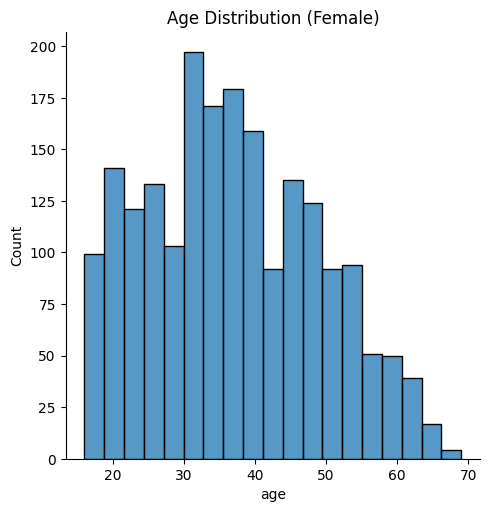

In [13]:
plt.figure(figsize=(9,7))
dfm = df.loc[df['sex'] == 'Female']
sns.displot(dfm['age'])
plt.title('Age Distribution (Female)')

Text(0.5, 1.0, 'Wages Distribution (Overall)')

<Figure size 900x700 with 0 Axes>

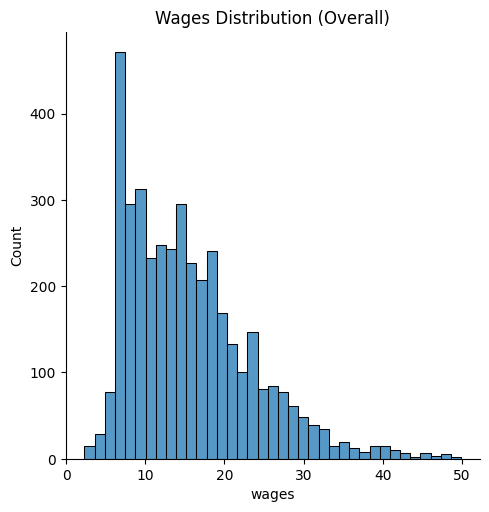

In [14]:
#Wages Distribution
plt.figure(figsize=(9,7))
sns.displot(df['wages'])
plt.title('Wages Distribution (Overall)')

Text(0.5, 1.0, 'Wages Distribution (Male)')

<Figure size 900x700 with 0 Axes>

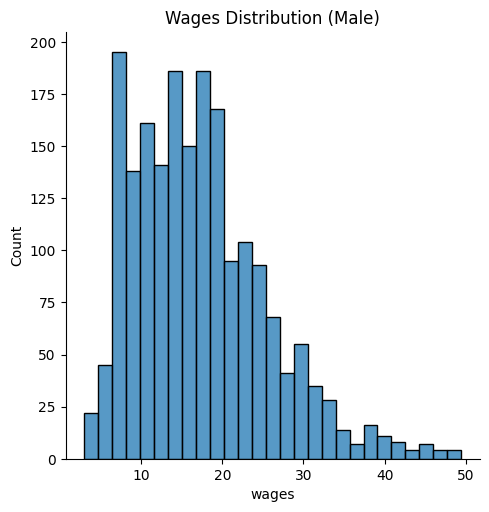

In [15]:
#Wages Distrbution (Male)
plt.figure(figsize=(9,7))
dfm = df.loc[df['sex'] == 'Male']
sns.displot(dfm['wages'])
plt.title('Wages Distribution (Male)')

Text(0.5, 1.0, 'Age Distribution (Female)')

<Figure size 900x700 with 0 Axes>

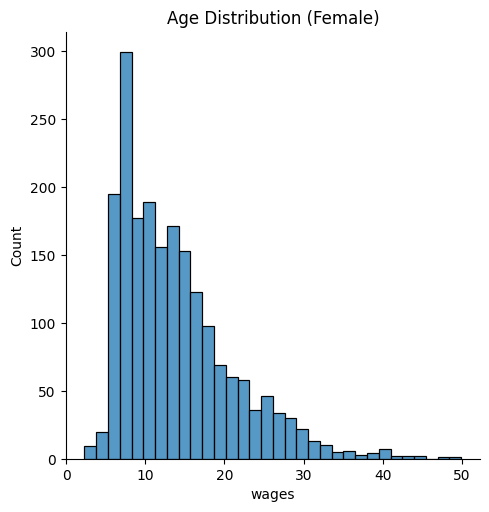

In [16]:
plt.figure(figsize=(9,7))
dfm = df.loc[df['sex'] == 'Female']
sns.displot(dfm['wages'])
plt.title('Age Distribution (Female)')

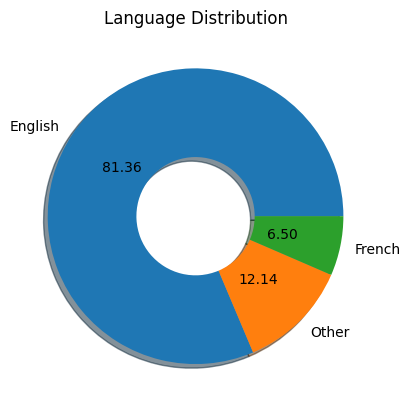

In [17]:
#Language Distribution
lan = df['language'].value_counts()
plt.pie(lan, labels=lan.index, shadow=True, wedgeprops=dict(width = 0.6), autopct='%1.2f')
plt.title("Language Distribution")
plt.show()

Text(0.5, 1.0, 'Wage Distribution for English Speakers')

<Figure size 900x700 with 0 Axes>

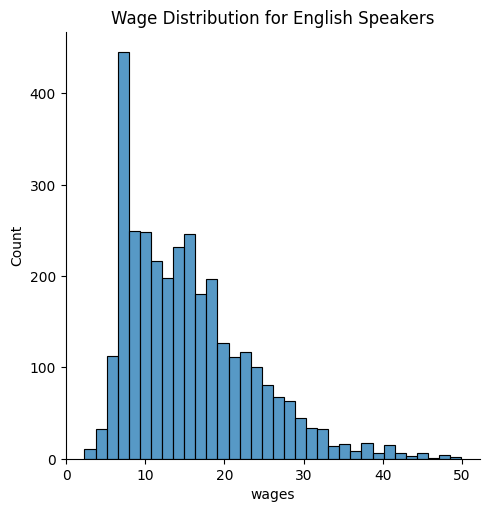

In [18]:
#How Language Affects Wages
eng = df.loc[df['language'] == 'English']
plt.figure(figsize=(9,7))
sns.displot(eng['wages'])
plt.title("Wage Distribution for English Speakers")

Text(0.5, 1.0, 'Wage Distribution for French Speakers')

<Figure size 900x700 with 0 Axes>

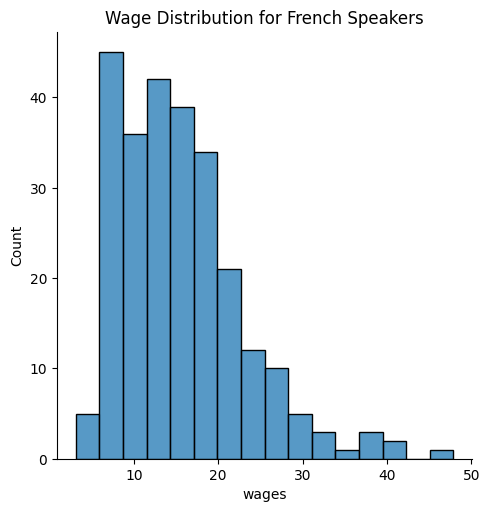

In [19]:
frn = df.loc[df['language'] == 'French']
plt.figure(figsize=(9,7))
sns.displot(frn['wages'])
plt.title("Wage Distribution for French Speakers")

Text(0.5, 1.0, 'Wage Distribution for Other Language Speakers')

<Figure size 900x700 with 0 Axes>

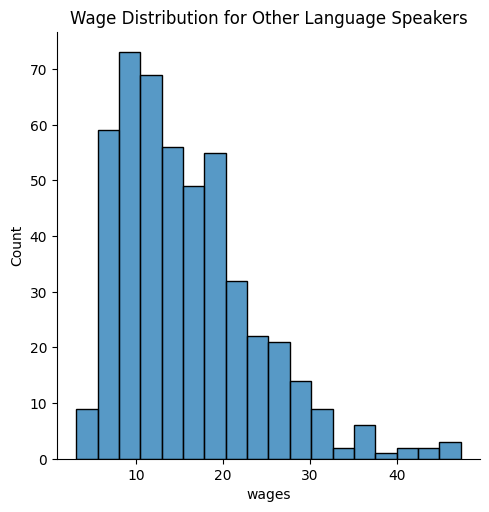

In [20]:
oth = df.loc[df['language'] == 'Other']
plt.figure(figsize=(9,7))
sns.displot(oth['wages'])
plt.title("Wage Distribution for Other Language Speakers")

In [32]:
#How are Wages and Education Related to Each other
x = np.array(df['education']).reshape(-1, 1)
y = np.array(df['wages'].values).reshape(-1, 1)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
linReg = LinearRegression()
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)
linReg.fit(xtrain, ytrain)
ypred = linReg.predict(xtest)
print(ypred)

[[14.57371053]
 [19.46194382]
 [14.98106331]
 [17.42517995]
 [12.94429944]
 [19.86929659]
 [18.81017938]
 [12.94429944]
 [17.99547383]
 [14.57371053]
 [12.94429944]
 [17.83253272]
 [12.53694667]
 [15.79576885]
 [13.75900499]
 [18.2398855 ]
 [12.94429944]
 [18.48429716]
 [17.83253272]
 [14.57371053]
 [14.57371053]
 [14.57371053]
 [14.98106331]
 [11.31488835]
 [14.57371053]
 [18.07694439]
 [21.09135491]
 [12.94429944]
 [19.46194382]
 [14.98106331]
 [17.01782718]
 [16.20312163]
 [20.60253158]
 [13.75900499]
 [12.94429944]
 [15.38841608]
 [14.57371053]
 [14.57371053]
 [17.09929773]
 [21.09135491]
 [18.48429716]
 [12.94429944]
 [14.57371053]
 [14.57371053]
 [18.64723827]
 [21.09135491]
 [16.20312163]
 [12.94429944]
 [13.75900499]
 [17.01782718]
 [15.38841608]
 [17.01782718]
 [14.57371053]
 [20.27664936]
 [14.57371053]
 [18.07694439]
 [14.57371053]
 [14.98106331]
 [14.16635776]
 [15.38841608]
 [15.38841608]
 [14.57371053]
 [18.2398855 ]
 [14.57371053]
 [15.38841608]
 [18.64723827]
 [14.57371

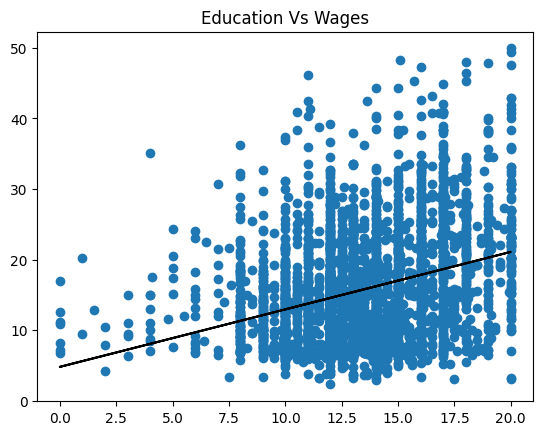

In [34]:
plt.scatter(xtrain, ytrain)
plt.plot(xtrain, linReg.predict(xtrain), color = 'Black')
plt.title('Education Vs Wages')
plt.show()